# Databases

Relational databases; Using SQLite & [DB Browser for SQLite](https://sqlitebrowser.org/) *or* [DBeaver](https://dbeaver.io/)

__Attribute__ ---> __Column__

__Tuple__ ---> __Row__

__Relation__ ---> __Table__

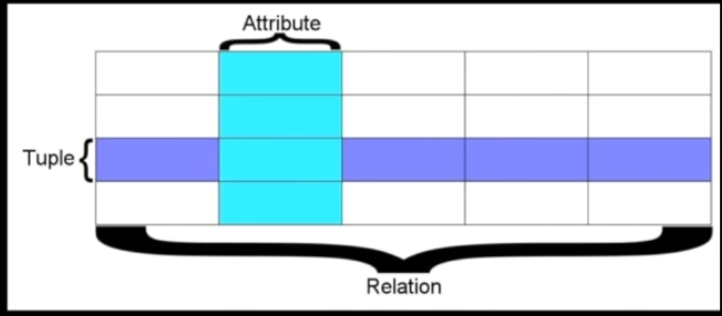

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/database.png")

### Create & access database in Python:

Create new database & establish a connection:

In [2]:
import sqlite3

## open if it exists, but if not create new database in same directory
conn = sqlite3.connect('emaildb.sqlite') 

## gateway to access database commands
cur = conn.cursor() 

If a table called `Counts` already exists, delete it so we can create a new table called `Counts` in the next cell:

In [3]:
cur.execute('DROP TABLE IF EXISTS Counts')



## this is also the same as above:
# cur.execute(''' 
#         CREATE TABLE IF NOT EXISTS Counts (email TEXT, count INTEGER)
# ''')

Create new table called `Counts` with an email & count field:

In [4]:
cur.execute('CREATE TABLE Counts (email TEXT, count INTEGER)')

1. Open/read file called 'emails.txt'
2. Find & retrieve email addresses (only if line starts with "From:"), then store them in a list
3. Loop through list & insert emails into SQL & count the number of each email address

Step 1:

In [5]:
file_name = 'emails.txt'

file_handle = open(file_name)

Step 2:

In [6]:
emails = []

for line in file_handle:
    ## skip lines that don't start with "From: "
    if not line.startswith('From: '):
        continue
    
    ## split the line by each word & store words in a list called "txt_pieces"
    txt_pieces = line.split()

    ## Get the 2nd "split piece" of the line, or index 1 of the list
    print(txt_pieces[1])
    emails.append(txt_pieces[1])

hunter123@walmart.gov
bob@walmart.gov
squidward@ohio.com
priscilla@kohlscash.org
bob@walmart.gov
refrigerator@ohio.com
queenelizabeth@iambritish.net
queenelizabeth@iambritish.net
queenelizabeth@iambritish.net


Step 3 (combining with Step 2):

In [7]:
for email in emails:
    ## Find out whether the email address already exists in table; can also act as an error-checker for any syntax errors or typos
    # NOTE: Question mark (?) is a placeholder so you don't have to directly type sensitive user data and to avoid SQL injection attacks;
    #       Can have multiple '?' placeholder & enter the variable name (e.g. email) of the resulting value in the tuple;
    #       Comma after the end of the tuple is required for syntax (e.g. "(email,)"
    cur.execute('''
                    SELECT count FROM Counts 
                    WHERE email = ?
                ''', (email,)
    )
    row = cur.fetchone() # if no records to above SELECT statement, then resulting value is 'None'

    ## if email address doesn't already exist, insert email into the database with a starting count of 1
    if row is None:
        cur.execute(
            ''' 
                INSERT INTO Counts (email, count)
                VALUES (?, 1)
            ''', (email,)
        )
    
    ## if email address does exist, then add 1 to count
    else:
        cur.execute(
            ''' 
                UPDATE Counts
                SET count = count + 1
                WHERE email = ?
            ''', (email,)
        )
    
    ## Writes above SQL statements to disk, rather than just keeping the in memory
    # in this example, it's saving to disk for every iteration of this for loop
    conn.commit()


Print email addresses & their counts that have been inserted into the database, then close the database connection:

In [9]:
sqlstr = ''' 
        SELECT email, count FROM Counts
        ORDER BY count DESC
'''

for row in cur.execute(sqlstr):
    print(str(row[0]), str(row[1]))


## Close database connection
cur.close()

queenelizabeth@iambritish.net 3
bob@walmart.gov 2
hunter123@walmart.gov 1
squidward@ohio.com 1
priscilla@kohlscash.org 1
refrigerator@ohio.com 1


`emaildb.sqlite` database is now showing up in the same folder & can be opened up in DB Browser or DBeaver

<hr>

### Database Design

__Basic & most important rule: Try not to put the same <u>string</u> data in the same column of a table; create a new table & 
use a relationship to another table instead__
* Use integer keys (*primary* & *foreign* keys) for these relationships:

So instead of this:

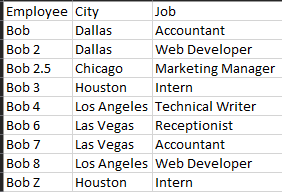

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/databasedesign1.png")

Consider something like this:

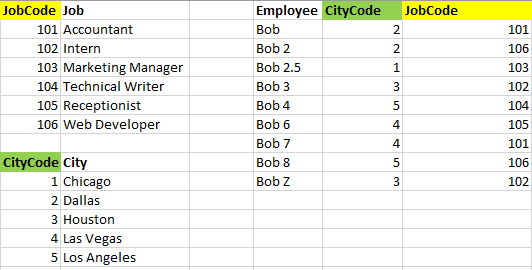

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/databasedesign2.png")

__Example: Digital Song Database__

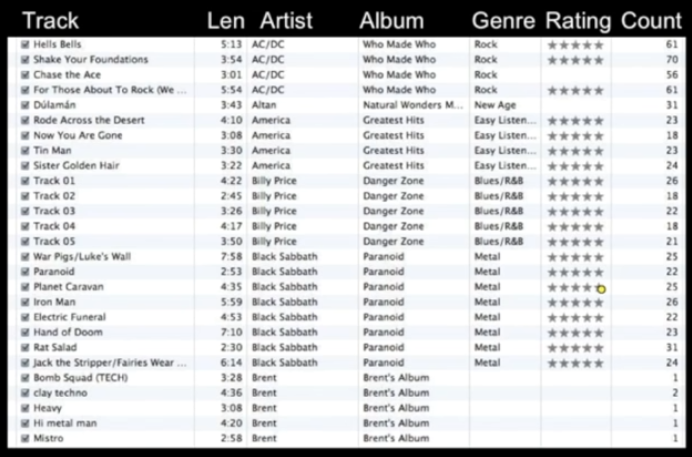

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/digtial-song-database.png", width=600)

Now divided into 4 separate relational tables:

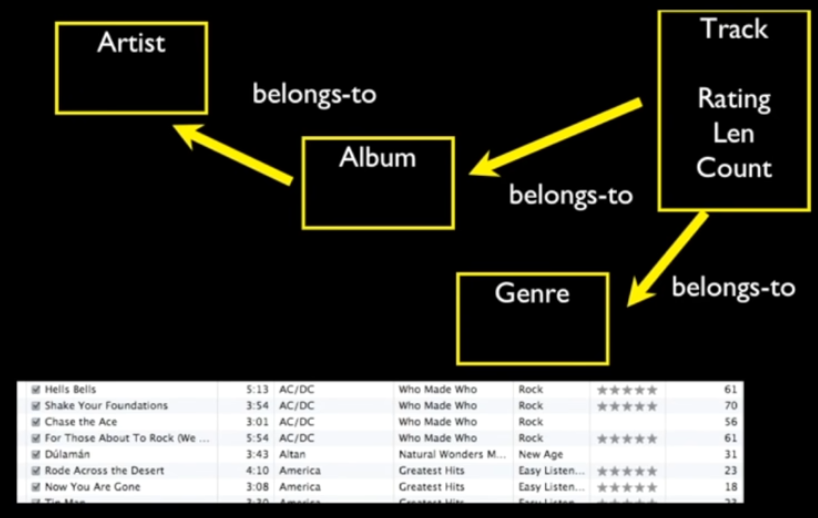

In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/digtial-song-database2.png", width=600)

With these new tables, have them connect with integer keys:

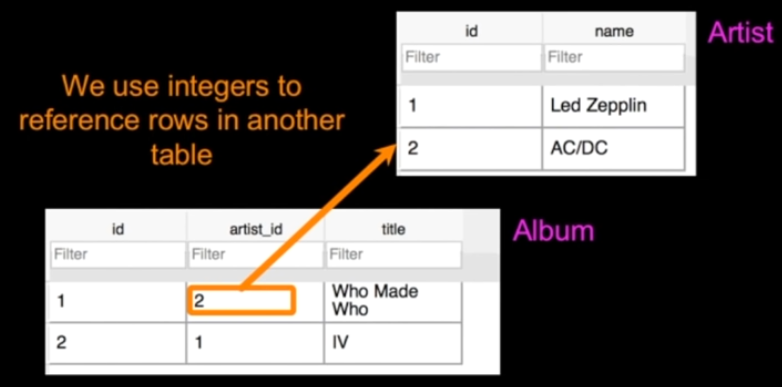

In [15]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/integer-keys.png", width=600)

__Three kinds of keys:__

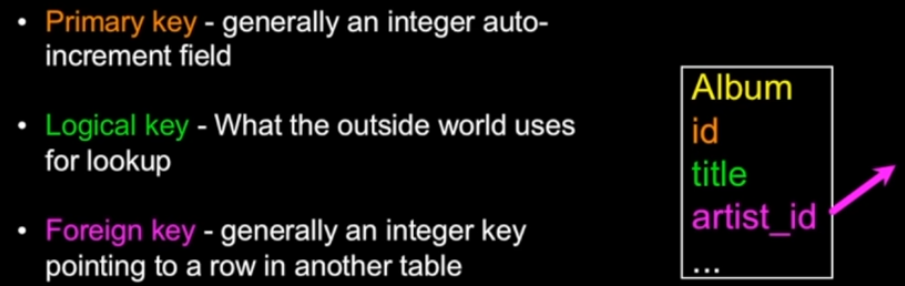

In [16]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="../aa_Screenshots/integer-keys2.png", width=600)